In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
#import open3d as o3d

from disparitySSD import disparitySSD

import warnings
warnings.filterwarnings("ignore")

In [14]:
# Reading images
leftImg = cv2.imread('frameLeftgray.png', 0)
rightImg = cv2.imread('frameRightgray.png', 0)

# Calling disparitySSD function to get disparity map
disparityImg = disparitySSD(leftImg, rightImg, 1, 15)

In [15]:
def reconstructSceneCU(disparityImg):
    siz = np.shape(disparityImg)
    
    # Computation of Baseline using geometric relation for disparity
    depthValueMat = np.zeros([siz[0], siz[1]])
    pp1 = [316.8934, 234.5534] # stereo_params.CameraParameters1.PrincipalPoint
    pp2 = [325.7300, 237.7642] # stereo_params.CameraParameters2.PrincipalPoint
    focalLength = [530.3463,  528.7529] # stereo_params.CameraParameters1.FocalLength
    focalAvg = (focalLength[0] + focalLength[1]) / 2
    
    baseline = np.sqrt((pp2[0]-pp1[0])**2 + (pp2[1]-pp1[1])**2)
    
    for row in range(0,siz[0]):
        for col in range(0, siz[1]):
            depthValueMat[row, col] = ((focalAvg * baseline) / disparityImg[row,col])
    return depthValueMat
        
depthValueMat = reconstructSceneCU(disparityImg)

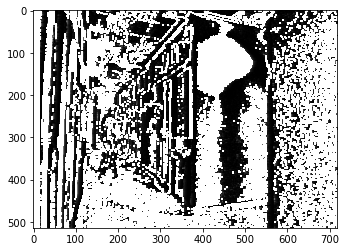

In [16]:
plt.imshow(depthValueMat,cmap='gray')

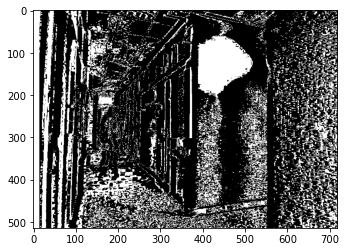

In [5]:
plt.imshow(points3D,cmap='gray')
plt.savefig('points3D.png')